<a href="https://colab.research.google.com/github/AllanBottino/Series_Temporais_Python/blob/main/Estacionando_S%C3%A9ries_Temporais_Parte_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Importando as Bibliotecas:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import warnings
warnings.filterwarnings("ignore")

# 2 - Carregando o dataset:

In [3]:
# Vamos carregar os dois arquivos:

#train=pd.read_csv("C:/Users/Allan/Documents/Projetos/store_item_demand_train.csv")
#test=pd.read_csv("C:/Users/Allan/Documents/Projetos/store_item_demand_test.csv")

from google.colab import files
uploaded = files.upload()

Saving store_item_demand_test.csv to store_item_demand_test.csv
Saving store_item_demand_train.csv to store_item_demand_train.csv


In [5]:
import io

train = pd.read_csv(io.BytesIO(uploaded['store_item_demand_train.csv']), parse_dates=['date'], index_col='date')

test = pd.read_csv(io.BytesIO(uploaded['store_item_demand_test.csv']), parse_dates=['date'], index_col='date')

# Junto os dois arquivos (train e test) em uma só coisa.
df = pd.concat([train, test])

# Crio uma cópia do dataframe original e uso a cópia, existem inúmeras vantagens de se usar desta maneira.
df1 = df.copy()

# Aqui eu selecionei para vermos apenas o item 14 da store 1.
df1= df1[df1['store']==1]
df1 = df1[df1['item']==14]

# Aqui vamos selecionar essa range de data e reamostrar por semana e pegar somente as somas semanais.
df1 = df1['2013-12-01':'2017-12-30'].resample('W').sum()


# Deleto algumas colunas:
df1.drop(["id", "store", "item"], axis =1, inplace = True)

# Uso o print pois eu acho que com print fica melhor de se ver as informações.
print(df1.head())

            sales
date             
2013-12-01   33.0
2013-12-08  254.0
2013-12-15  236.0
2013-12-22  262.0
2013-12-29  234.0


# 3 - Primeiras Análises:

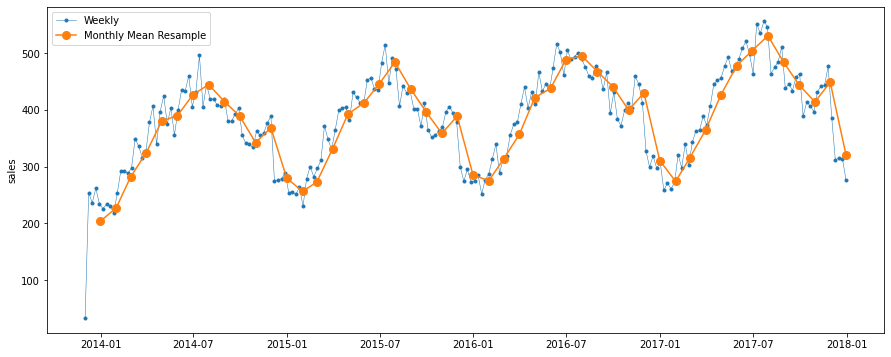

In [32]:
y = df1['sales']

fig, ax = plt.subplots(figsize=(15, 6))

# Aqui eu ploto a série original:
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')

#Aqui eu  ploto a série reamostrada por mês:
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')

ax.set_ylabel("sales")
ax.legend();

O gráfico já estava reamostrado por semana (os pontos azuis) e depois eu criei a média mensal(os pontos alaranjados), podemos ver uma sazonalidade, onde no meio do ano temos o pico de vendas e depois começa a cair até o inicio do outro ano e assim segue, não conseguimos ver exatamente se conforme os anos passam as vendas aumentam ou diminúi, para isso vamos decompor essa série temporal na célula abaixo:

# 4 - Decompondo :


Vamos decompor os dados para ver mais da complexidade por trás da visualização linear. Uma função Python útil chamada season_decompose dentro do pacote 'statsmodels' pode nos ajudar a decompor os dados em quatro componentes diferentes:

Observado
Tendências
Sazonal
Residual

https://www.statsmodels.org/stable/index.html

https://www.statsmodels.org/stable/index.html

In [7]:
import statsmodels.api as sm

def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    
    plt.show()

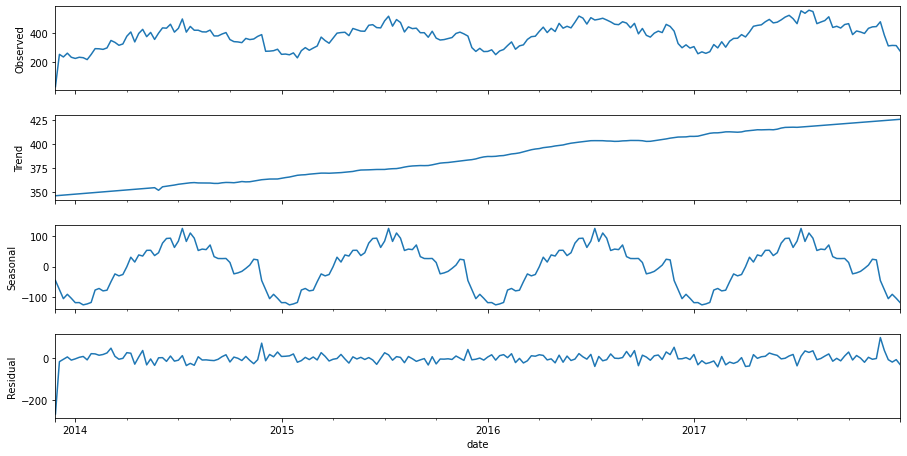

In [8]:
seasonal_decompose(y)

Podemos ver uma tendência de aumento, e um padrão na sazonalidade.

# 5 - Checando a Estacionariedade:

Vamos tirar uma prova matemática para descobrir se o conjunto de dados é estacionário ou não. Visualmente (a linha de tendência) ele não é estacionário.

Um conjunto de dados é estacionário se suas propriedades estatísticas, como média, variância e autocorrelação, não mudam com o tempo.

A maioria dos conjuntos de dados de séries temporais relacionados à atividade de negócios não são estacionários, pois geralmente há todos os tipos de elementos não estacionários, como tendências e ciclos econômicos. Mas, como a maioria dos modelos de previsão de série temporal usa estacionariedade e transformações matemáticas relacionadas a ela para fazer previsões, precisamos 'estacionarizar' a série temporal como parte do processo de ajuste de um modelo.

Dois métodos comuns para verificar a estacionariedade são a Visualização e o Teste Dickey-Fuller Aumentado (ADF). Python torna as duas abordagens fáceis: 

# 6 - Visualização:

Este método representa graficamente as estatísticas rotativas (média e variância) para mostrar rapidamente se o desvio padrão muda substancialmente ao longo do tempo:

In [9]:
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

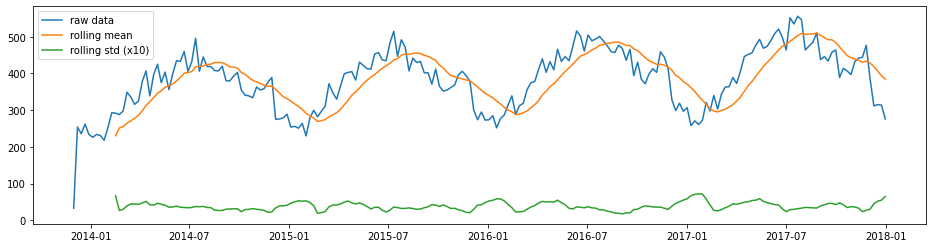

In [10]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'raw data')

Tanto a média quanto o desvio padrão para dados estacionários não mudam muito com o tempo. Mas não podemos concluir com segurança que nossos dados estão estacionários simplesmente visualizando o gráfico acima. Portanto, devemos fazer outro teste de estacionariedade.

# 7 - Augmented Dickey-Fuller Test:

A abordagem ADF é essencialmente um teste de significância estatística que compara o valor p com os valores críticos e faz testes de hipóteses. Usando este teste, podemos determinar se os dados processados ​​são estacionários ou não com diferentes níveis de confiança.

Neste artigo eu falo com mais detalhes sobre a decomposição de séries temporais e o teste de Dickey-Fuller em si:

https://www.linkedin.com/pulse/decomposi%C3%A7%C3%A3o-de-s%C3%A9ries-temporais-e-valida%C3%A7%C3%A3o-com-teste-allan-bottino/?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_post_details%3BZX0Tlm%2BkQbiVpmNu6KjNJA%3D%3D

In [11]:
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [12]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = -2.978
P-value = 0.037
Critical values :
	1%: -3.4621857592784546 - The data is not stationary with 99% confidence
	5%: -2.875537986778846 - The data is  stationary with 95% confidence
	10%: -2.574231080806213 - The data is  stationary with 90% confidence


Marquem bem o valor 0.037, vamos usar os métodos para tornar a série estacionária e vocês verão que ele se altera.

# 8 - Detrend

Detrend ou detrending serve para tirar a linha de tendência e ficar quase que puramente com o ciclo e a sazonalidade.

Este método subtrai a média e divide pelo desvio padrão. 



 > Is the de-trended data stationary ?
Test statistic = -3.906
P-value = 0.002
Critical values :
	1%: -3.4633090972761744 - The data is  stationary with 99% confidence
	5%: -2.876029332045744 - The data is  stationary with 95% confidence
	10%: -2.5744932593252643 - The data is  stationary with 90% confidence


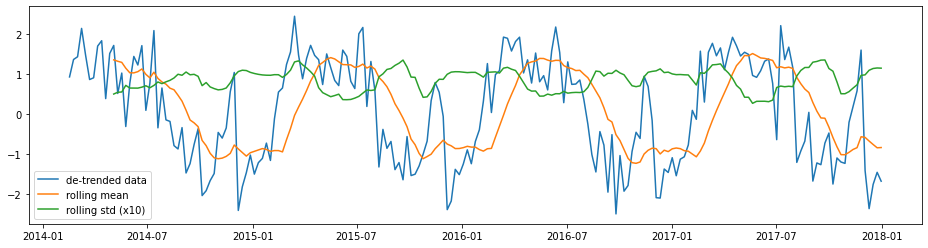

In [13]:
# y = nossos dados de vendas.

# y.rolling(window=12).mean() = a média móvel sobre 12 dos nossos dados.

# y.rolling(window=12).std = o desvio padrão sobre a média móvel sobre 12.

y_detrend = (y - y.rolling(window=12).mean()) / y.rolling(window=12).std()

# Abaixo o comando do teste adfuller:
test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

O primeiro teste de estacionariedade mostrou que o P-value é 0.037 e depois do detrending o P-value abaixou para zero. Ou seja temos 100% do teste provando a série se tornou estacionária.

# 9 - Diferenciação ou Difference Transform


A diferenciação é realizada subtraindo o valor observado anterior da observação atual.


 > Is the 1 lag differenced data stationary ?
Test statistic = -19.468
P-value = 0.000
Critical values :
	1%: -3.4615775784078466 - The data is  stationary with 99% confidence
	5%: -2.875271898983725 - The data is  stationary with 95% confidence
	10%: -2.5740891037735847 - The data is  stationary with 90% confidence


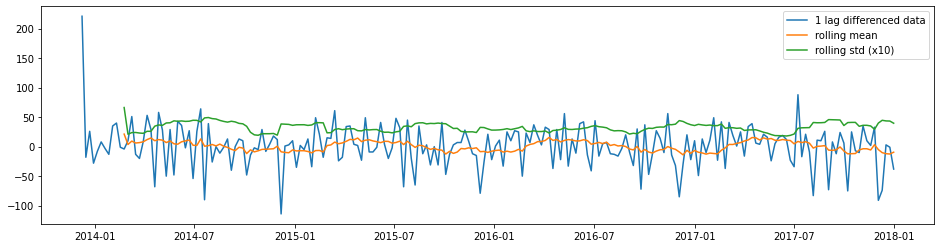

In [23]:
y_1_lag =  y - y.shift(1)

test_stationarity(y_1_lag,'1 lag differenced data')
ADF_test(y_1_lag,'1 lag differenced data')

Não é preciso muita explicação aqui, mas aqui está o link do manual do shift:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

Agora o comando do pandas para fazer a diferenciação:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html

 > Is the  stationary ?
Test statistic = -19.468
P-value = 0.000
Critical values :
	1%: -3.4615775784078466 - The data is  stationary with 99% confidence
	5%: -2.875271898983725 - The data is  stationary with 95% confidence
	10%: -2.5740891037735847 - The data is  stationary with 90% confidence


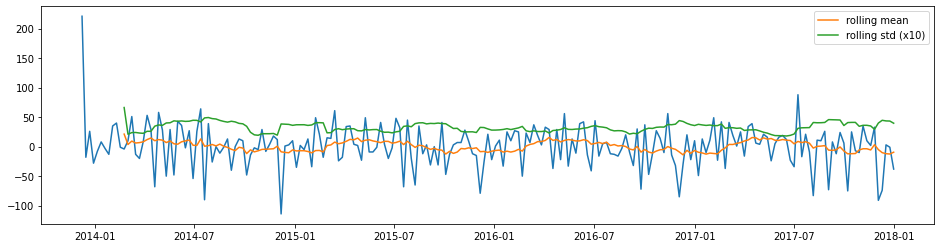

In [21]:
# Usando o diff:
item_diff = df1.sales.diff(periods=1)

# Esse comando faz parecido com o rolling, ele pega um tanto para cima e nisso gera 
# dados vazios, por isso vamos deletar eles para nãoa atrapalhar.
item_diff = item_diff.dropna()

test_stationarity(item_diff,'')
ADF_test(item_diff,'')

# 10 - Detrending + Differencing

Aqui uma ressalva, detrend e differencing pelas minhas pesquisas raramente é usado, mas deixa ele aqui como curiosidade.

 > Is the 12 lag differenced de-trended data stationary ?
Test statistic = -3.161
P-value = 0.022
Critical values :
	1%: -3.4682803641749267 - The data is not stationary with 99% confidence
	5%: -2.8782017240816327 - The data is  stationary with 95% confidence
	10%: -2.5756525795918366 - The data is  stationary with 90% confidence


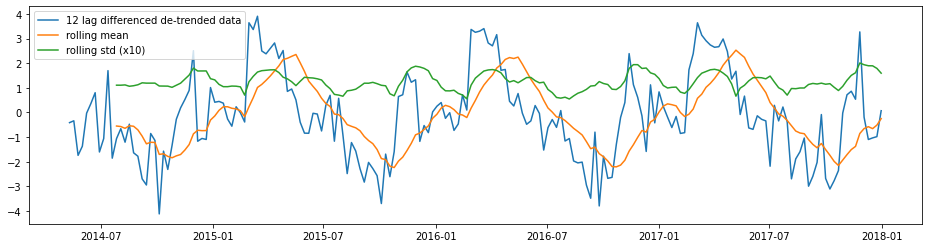

In [24]:
y_12lag_detrend =  y_detrend - y_detrend.shift(12)

test_stationarity(y_12lag_detrend,'12 lag differenced de-trended data')
ADF_test(y_12lag_detrend,'12 lag differenced de-trended data')

# 11 - Transformação Logaritmica

A transformação do log reduz ou remove a distorção de nossos dados originais.

 > Is the  stationary ?
Test statistic = -3.025
P-value = 0.033
Critical values :
	1%: -3.4623415245233145 - The data is not stationary with 99% confidence
	5%: -2.875606128263243 - The data is  stationary with 95% confidence
	10%: -2.574267439846904 - The data is  stationary with 90% confidence


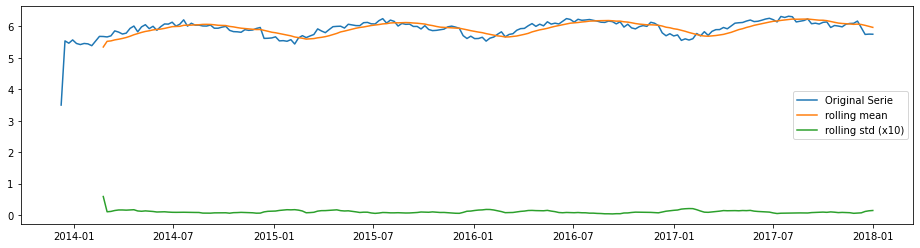

In [29]:
item_log = np.log(df1.sales.shift(1))
item_log = item_log.dropna()

test_stationarity(item_log,'Original Serie')
ADF_test(item_log,'')